## Importing Necessary Libararies and filtering warnings to maintain cleanlinnes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## Loading the dataset

In [2]:
movie_data = pd.read_csv('/content/IMDB_Dataset.csv')

In [3]:
movie_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


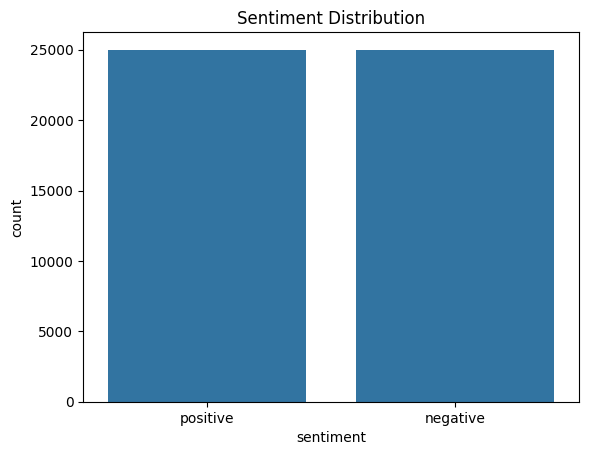

In [4]:
sns.countplot(x='sentiment', data=movie_data)
plt.title("Sentiment Distribution")
plt.show()

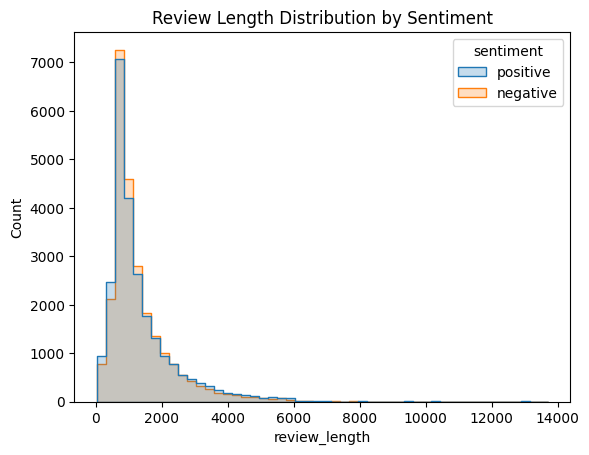

In [5]:
movie_data['review_length'] = movie_data['review'].apply(len)
sns.histplot(data=movie_data, x="review_length", hue="sentiment", element="step", bins=50)
plt.title("Review Length Distribution by Sentiment")
plt.show()

In [6]:
!pip install wordcloud

## Word Cloud Before Preprocessing

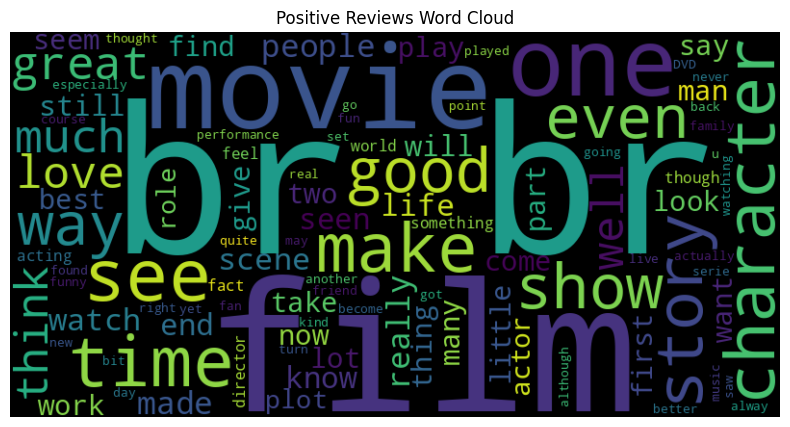

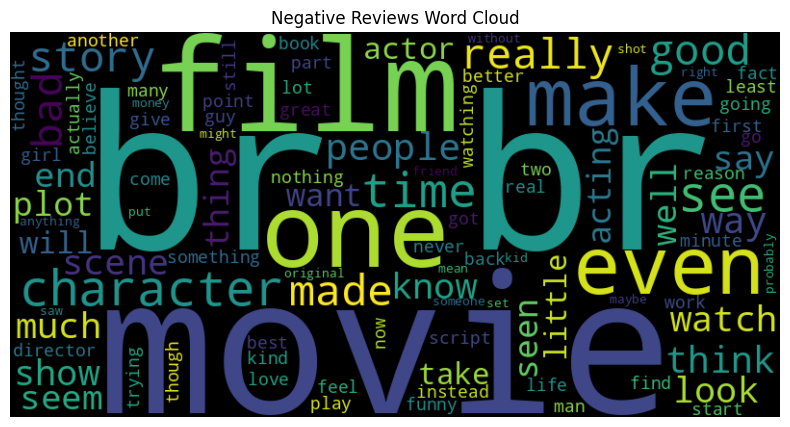

In [7]:
from collections import Counter
from wordcloud import WordCloud

# Separate positive and negative reviews
positive_reviews = ' '.join(movie_data[movie_data['sentiment'] == 'positive']['review'])
negative_reviews = ' '.join(movie_data[movie_data['sentiment'] == 'negative']['review'])

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, max_words=100).generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, max_words=100).generate(negative_reviews)

# Display word clouds
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title("Positive Reviews Word Cloud")
plt.axis("off")
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title("Negative Reviews Word Cloud")
plt.axis("off")
plt.show()

## Data Cleaning and Preprocessing



In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Added to download the missing resource

print("NLTK libraries and data downloaded successfully.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


NLTK libraries and data downloaded successfully.


In [9]:
movie_data

,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317
...,...,...,...
49995,I thought this movie did a down right good job...,positive,1008
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,642
49997,I am a Catholic taught in parochial elementary...,negative,1280
49998,I'm going to have to disagree with the previou...,negative,1234


In [10]:
import pandas as pd

def preprocess_text(text):
    text = re.sub(r'<br\s*/>', ' ', text)    # 1. Remove HTML tags like '<br />'
    text = re.sub(r'[^a-zA-Z\s]', '', text)# 2. Remove special characters (anything not a letter or space)
    text = text.lower() # 3. Convert to lowercase
    tokens = word_tokenize(text) # 4. Tokenize the text

    # Initialize stop words and lemmatizer once for efficiency
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # 5. Remove stopwords and 6. Perform lemmatization
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # 7. Join tokens back into a string
    return ' '.join(cleaned_tokens)

# Apply the preprocessing function to the 'review' column
movie_data['cleaned_review'] = movie_data['review'].apply(preprocess_text)

# Drop duplicate rows
initial_rows = movie_data.shape[0]
movie_data.drop_duplicates(inplace=True)
print(f"Dropped {initial_rows - movie_data.shape[0]} duplicate rows.")

# Drop rows with null values
initial_rows = movie_data.shape[0]
movie_data.dropna(inplace=True)
print(f"Dropped {initial_rows - movie_data.shape[0]} rows with null values.")

print("Preprocessing complete. Displaying head of the DataFrame with 'cleaned_review' column:")
display(movie_data.head())

Dropped 418 duplicate rows.
Dropped 0 rows with null values.
Preprocessing complete. Displaying head of the DataFrame with 'cleaned_review' column:


,review,sentiment,review_length,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,1761,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,positive,998,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,926,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,748,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,petter matteis love time money visually stunni...


## After Text Preprocessing, Word Cloud

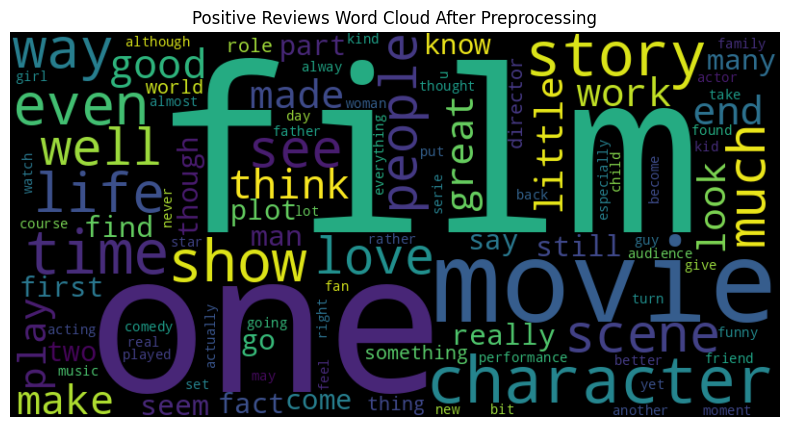

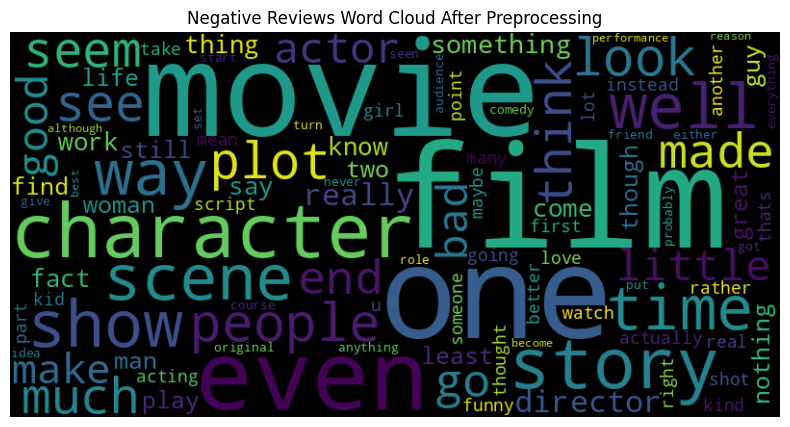

In [11]:
# Separate positive and negative reviews
positive_reviews = ' '.join(movie_data[movie_data['sentiment'] == 'positive']['cleaned_review'])
negative_reviews = ' '.join(movie_data[movie_data['sentiment'] == 'negative']['cleaned_review'])

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, max_words=100).generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, max_words=100).generate(negative_reviews)

# Display word clouds
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title("Positive Reviews Word Cloud After Preprocessing")
plt.axis("off")
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title("Negative Reviews Word Cloud After Preprocessing")
plt.axis("off")
plt.show()

## Count Sentiment Distribution after Preprocessing



Sentiment Distribution After Cleaning:
sentiment
positive    24884
negative    24698
Name: count, dtype: int64


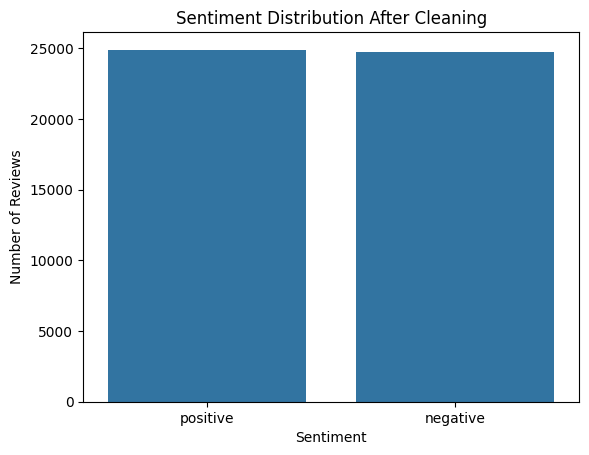

In [12]:
sentiment_counts = movie_data['sentiment'].value_counts()
print("Sentiment Distribution After Cleaning:")
print(sentiment_counts)

sns.countplot(x='sentiment', data=movie_data)
plt.title("Sentiment Distribution After Cleaning")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer with specified parameters
tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.9, ngram_range=(1, 2))

# Fit and transform the 'cleaned_review' column
X = tfidf_vectorizer.fit_transform(movie_data['cleaned_review'])

print("TF-IDF Vectorization Shape of the feature matrix X:")
X.shape


TF-IDF Vectorization Shape of the feature matrix X:


(49582, 175520)

In [14]:
from sklearn.model_selection import train_test_split

# Convert sentiment to numerical labels
y = movie_data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("-"*40)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

----------------------------------------
X_train shape: (39665, 175520)
X_test shape: (9917, 175520)
y_train shape: (39665,)
y_test shape: (9917,)


## Model Training and Evaluation




In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
print("Training Logistic Regression model...")
logistic_model.fit(X_train, y_train)
print("Logistic Regression model training complete.")

# Make predictions on the test set
y_pred_lr = logistic_model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print(f"\nLogistic Regression Model Accuracy: {accuracy_lr:.4f}")
print("\nLogistic Regression Model Classification Report:")
print(report_lr)

Training Logistic Regression model...
Logistic Regression model training complete.

Logistic Regression Model Accuracy: 0.8950

Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      4940
           1       0.88      0.91      0.90      4977

    accuracy                           0.90      9917
   macro avg       0.90      0.89      0.89      9917
weighted avg       0.90      0.90      0.90      9917



In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available cores
print("Training Random Forest model...")
random_forest_model.fit(X_train, y_train)
print("Random Forest model training complete.")

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"\nRandom Forest Model Accuracy: {accuracy_rf:.4f}")
print("\nRandom Forest Model Classification Report:")
print(report_rf)

Training Random Forest model...
Random Forest model training complete.

Random Forest Model Accuracy: 0.8611

Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4940
           1       0.86      0.87      0.86      4977

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917



## Test with a New Review and Compare Model Predictions

In [17]:
def predict_sentiment_for_review(review_text):
    # 1. Preprocess the input review
    cleaned_input_review = preprocess_text(review_text)
    print(f"\nOriginal Review: {review_text}")
    print(f"Cleaned Review: {cleaned_input_review}")

    # 2. Vectorize the cleaned review using the trained TF-IDF vectorizer
    # The input needs to be in a list format for the transform method
    vectorized_input = tfidf_vectorizer.transform([cleaned_input_review])

    # 3. Predict sentiment using Logistic Regression
    pred_lr = logistic_model.predict(vectorized_input)[0]
    sentiment_lr = 'positive' if pred_lr == 1 else 'negative'

    # 4. Predict sentiment using Random Forest
    pred_rf = random_forest_model.predict(vectorized_input)[0]
    sentiment_rf = 'positive' if pred_rf == 1 else 'negative'

    results = pd.DataFrame({
        'Model': ['Logistic Regression', 'Random Forest'],
        'Predicted Sentiment': [sentiment_lr, sentiment_rf]
    })

    print("\nModel Predictions:")
    display(results)

random_review = "This movie was absolutely fantastic! I loved every single moment of it. The acting was superb and the plot was incredibly engaging."
predict_sentiment_for_review(random_review)

random_review_2 = "The movie was terrible, a complete waste of time. The plot made no sense and the actors were awful."
predict_sentiment_for_review(random_review_2)

random_review_3 = "It was an okay film, nothing spectacular, but not bad either. A bit slow at times."
predict_sentiment_for_review(random_review_3)


Original Review: This movie was absolutely fantastic! I loved every single moment of it. The acting was superb and the plot was incredibly engaging.
Cleaned Review: movie absolutely fantastic loved every single moment acting superb plot incredibly engaging

Model Predictions:


,Model,Predicted Sentiment
0,Logistic Regression,positive
1,Random Forest,positive



Original Review: The movie was terrible, a complete waste of time. The plot made no sense and the actors were awful.
Cleaned Review: movie terrible complete waste time plot made sense actor awful

Model Predictions:


,Model,Predicted Sentiment
0,Logistic Regression,negative
1,Random Forest,negative



Original Review: It was an okay film, nothing spectacular, but not bad either. A bit slow at times.
Cleaned Review: okay film nothing spectacular bad either bit slow time

Model Predictions:


,Model,Predicted Sentiment
0,Logistic Regression,negative
1,Random Forest,negative


## Display Confusion Matrix For Logistic Regression





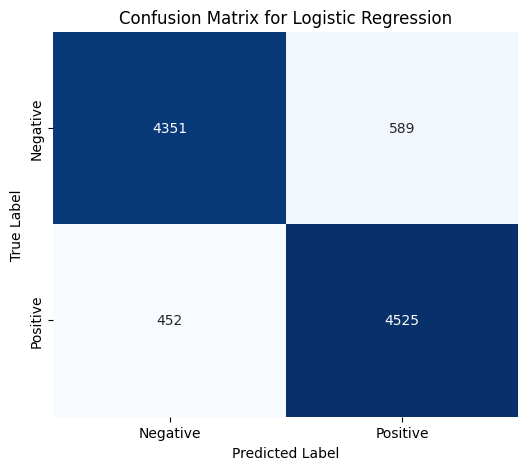

Confusion Matrix for Logistic Regression:
[[4351  589]
 [ 452 4525]]


In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

print("Confusion Matrix for Logistic Regression:")
print(cm_lr)

## Ploting ROC Curve for Logistic Regression



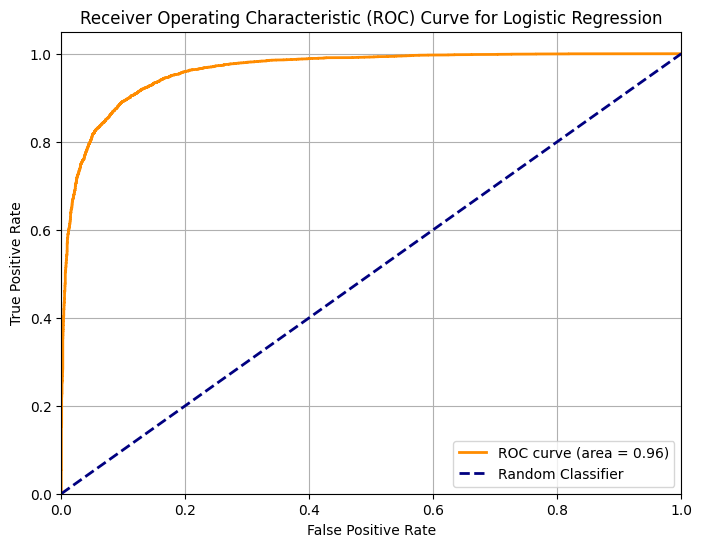

AUC for Logistic Regression: 0.9628


In [19]:
from sklearn.metrics import roc_curve, auc

# Get probability predictions for the positive class (class 1)
y_pred_proba_lr = logistic_model.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR, and thresholds
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)

# Calculate AUC
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"AUC for Logistic Regression: {roc_auc_lr:.4f}")

## Precision Recall Curve for Logistic Regression


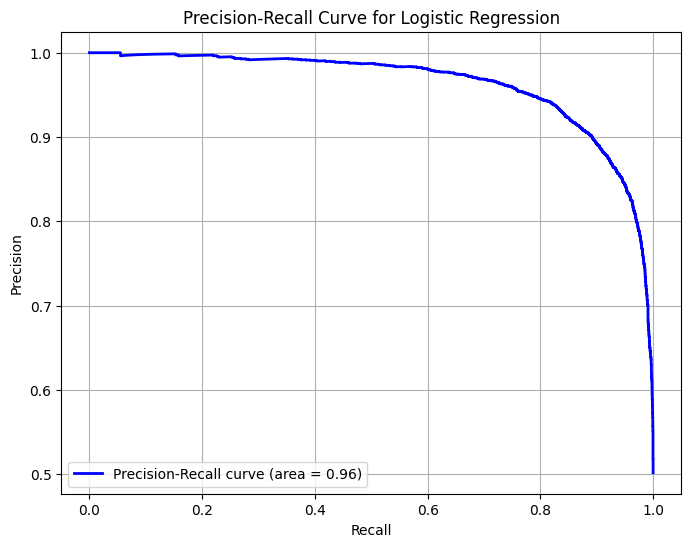

AUC for Precision-Recall (AP) for Logistic Regression: 0.9627


In [20]:
from sklearn.metrics import precision_recall_curve, auc

# Get probability predictions for the positive class (class 1)
# y_pred_proba_lr is already computed in the previous step

# Calculate Precision, Recall, and thresholds
precision_lr, recall_lr, thresholds_pr = precision_recall_curve(y_test, y_pred_proba_lr)

# Calculate AUC for Precision-Recall curve
pr_auc_lr = auc(recall_lr, precision_lr)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc_lr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

print(f"AUC for Precision-Recall (AP) for Logistic Regression: {pr_auc_lr:.4f}")

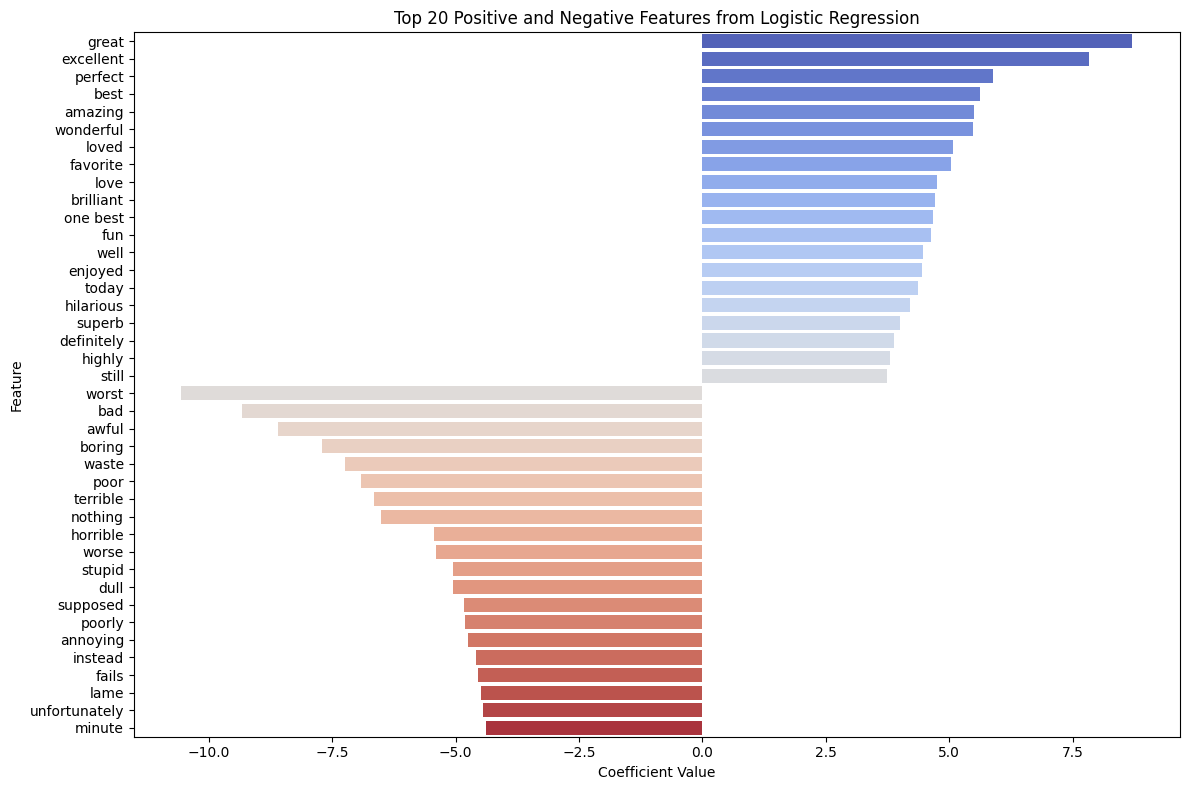

Top 20 Positive Features:
great         8.710877
excellent     7.822746
perfect       5.881562
best          5.623343
amazing       5.511045
wonderful     5.486600
loved         5.074284
favorite      5.032603
love          4.746274
brilliant     4.707590
one best      4.673837
fun           4.624163
well          4.467772
enjoyed       4.451432
today         4.373263
hilarious     4.201187
superb        4.001200
definitely    3.885802
highly        3.798548
still         3.728996
dtype: float64

Top 20 Negative Features:
worst           -10.555221
bad              -9.322067
awful            -8.589128
boring           -7.705128
waste            -7.232386
poor             -6.911109
terrible         -6.658661
nothing          -6.518794
horrible         -5.433302
worse            -5.391765
stupid           -5.060566
dull             -5.060173
supposed         -4.822982
poorly           -4.809897
annoying         -4.754640
instead          -4.595393
fails            -4.554181
lame         

In [21]:
feature_names = tfidf_vectorizer.get_feature_names_out()
coefs = logistic_model.coef_[0]

# Create a Series of coefficients with feature names as index
coef_df = pd.Series(coefs, index=feature_names)

# Get top 20 positive features
top_positive_features = coef_df.nlargest(20)

# Get top 20 negative features
top_negative_features = coef_df.nsmallest(20)

# Combine for plotting
combined_features = pd.concat([top_positive_features, top_negative_features])

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=combined_features.values, y=combined_features.index, palette='coolwarm')
plt.title('Top 20 Positive and Negative Features from Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("Top 20 Positive Features:")
print(top_positive_features)
print("\nTop 20 Negative Features:")
print(top_negative_features)

## Display Confusion Matrix For Random Forest


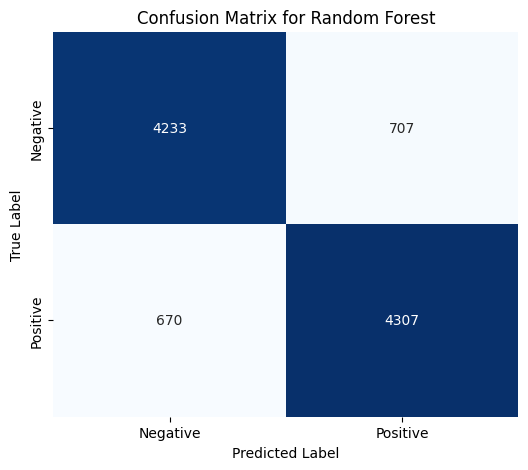

Confusion Matrix for Random Forest:
[[4233  707]
 [ 670 4307]]


In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()

print("Confusion Matrix for Random Forest:")
print(cm_rf)

## Plot ROC Curve for Random Forest


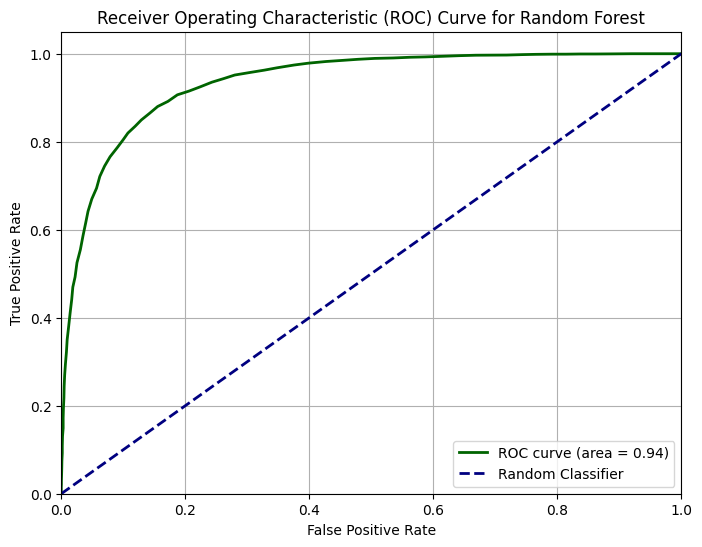

AUC for Random Forest: 0.9357


In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Get probability predictions for the positive class (class 1)
y_pred_proba_rf = random_forest_model.predict_proba(X_test)[:, 1]

# 2. Calculate FPR, TPR, and thresholds
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)

# 3. Calculate AUC
roc_auc_rf = auc(fpr_rf, tpr_rf)

# 4. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkgreen', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')

# 5. Include a diagonal dashed line for random classifier
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"AUC for Random Forest: {roc_auc_rf:.4f}")

## Precision-Recall Curve for Random Forest



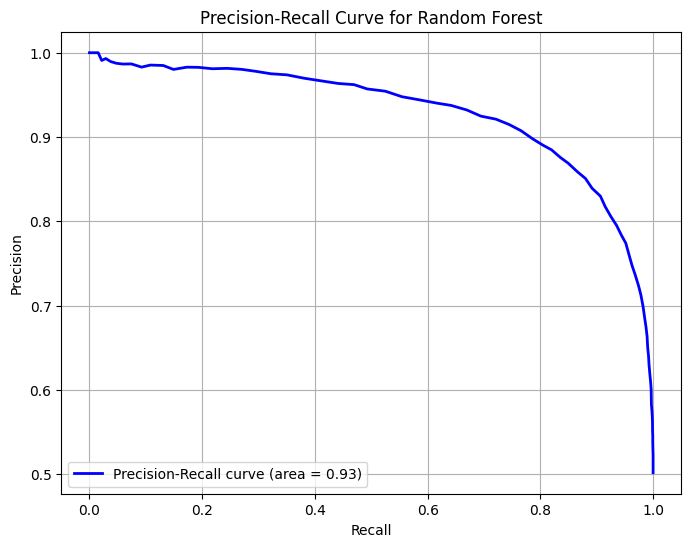

AUC for Precision-Recall (AP) for Random Forest: 0.9306


In [24]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Get probability predictions for the positive class (class 1) for Random Forest
# y_pred_proba_rf is already computed in the previous step

# Calculate Precision, Recall, and thresholds
precision_rf, recall_rf, thresholds_pr_rf = precision_recall_curve(y_test, y_pred_proba_rf)

# Calculate AUC for Precision-Recall curve
pr_auc_rf = auc(recall_rf, precision_rf)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc_rf:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

print(f"AUC for Precision-Recall (AP) for Random Forest: {pr_auc_rf:.4f}")

## Top Features from Random Forest




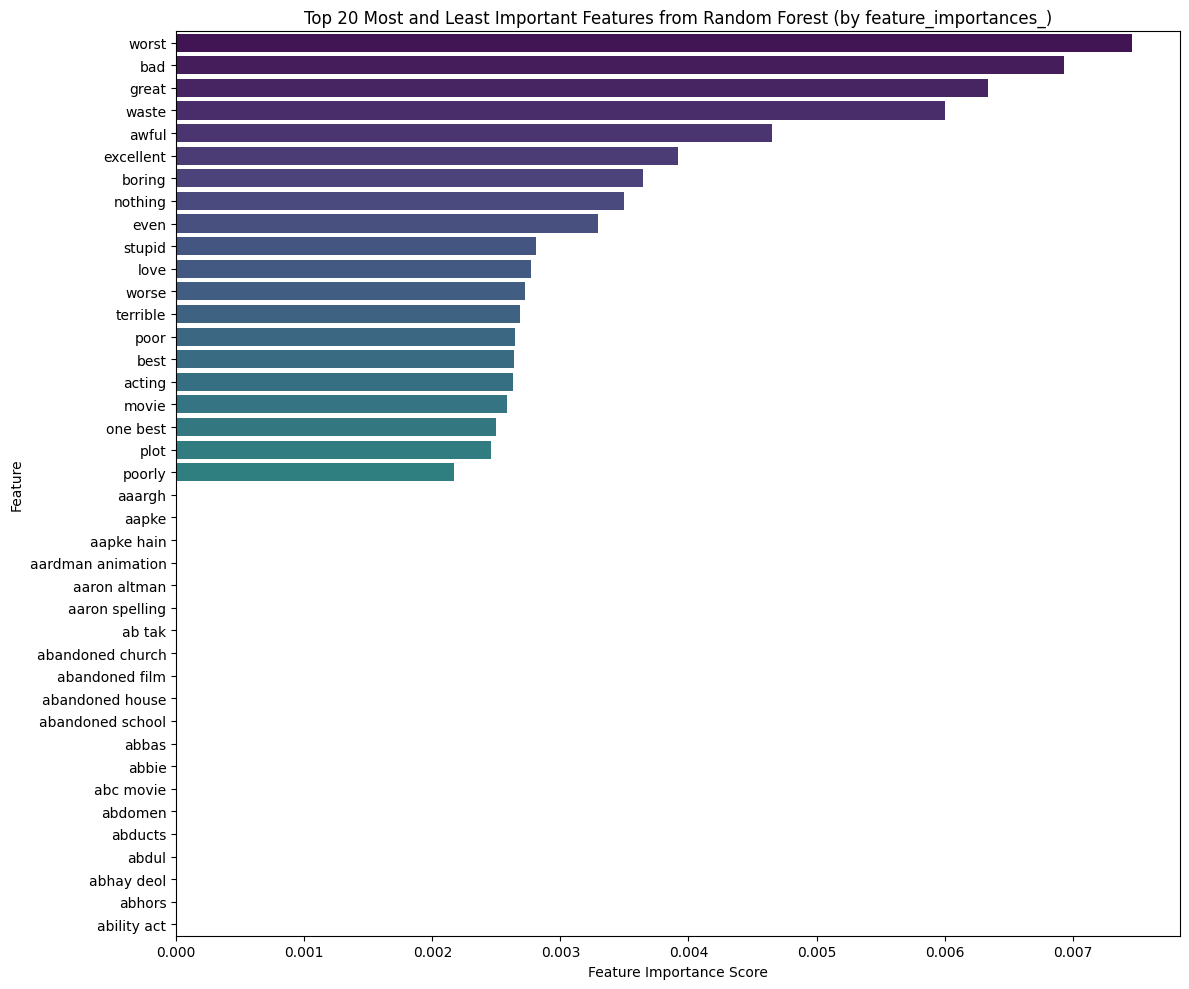

Top 20 Most Important Features (Overall):
worst        0.007464
bad          0.006932
great        0.006338
waste        0.006006
awful        0.004655
excellent    0.003916
boring       0.003641
nothing      0.003496
even         0.003292
stupid       0.002807
love         0.002772
worse        0.002726
terrible     0.002681
poor         0.002643
best         0.002634
acting       0.002626
movie        0.002580
one best     0.002497
plot         0.002456
poorly       0.002168
dtype: float64

Top 20 Least Important Features (Overall):
aaargh               0.0
aapke                0.0
aapke hain           0.0
aardman animation    0.0
aaron altman         0.0
aaron spelling       0.0
ab tak               0.0
abandoned church     0.0
abandoned film       0.0
abandoned house      0.0
abandoned school     0.0
abbas                0.0
abbie                0.0
abc movie            0.0
abdomen              0.0
abducts              0.0
abdul                0.0
abhay deol           0.0
abhors   

In [25]:
# 1. Access the feature_importances_ attribute of the random_forest_model
feature_importances_rf = random_forest_model.feature_importances_

# 2. Retrieve the feature names from the tfidf_vectorizer
feature_names_rf = tfidf_vectorizer.get_feature_names_out()

# 3. Create a pandas Series mapping the feature names to their importance scores
feature_importance_series_rf = pd.Series(feature_importances_rf, index=feature_names_rf)

top_20_most_important_rf = feature_importance_series_rf.nlargest(20)
top_20_least_important_rf = feature_importance_series_rf.nsmallest(20)

# Combine for plotting
combined_features_rf = pd.concat([top_20_most_important_rf, top_20_least_important_rf])

# 5. Create a bar plot to visualize these top 40 features
plt.figure(figsize=(12, 10))
sns.barplot(x=combined_features_rf.values, y=combined_features_rf.index, palette='viridis')
plt.title('Top 20 Most and Least Important Features from Random Forest (by feature_importances_)')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# 6. Print the lists of top 20 most and least important features
print("Top 20 Most Important Features (Overall):")
print(top_20_most_important_rf)
print("\nTop 20 Least Important Features (Overall):")
print(top_20_least_important_rf)

## Improving Logistic Regression Accuracy Attempt 1




In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(C=0.1, max_iter=1000, random_state=42)
print("Training Logistic Regression model with C=0.1...")
logistic_model.fit(X_train, y_train)
print("Logistic Regression model training complete.")

# Make predictions on the test set
y_pred_lr = logistic_model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print(f"\nLogistic Regression Model (C=0.1) Accuracy: {accuracy_lr:.4f}")
print("\nLogistic Regression Model (C=0.1) Classification Report:")
print(report_lr)

Training Logistic Regression model with C=0.1...
Logistic Regression model training complete.

Logistic Regression Model (C=0.1) Accuracy: 0.8685

Logistic Regression Model (C=0.1) Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      4940
           1       0.85      0.90      0.87      4977

    accuracy                           0.87      9917
   macro avg       0.87      0.87      0.87      9917
weighted avg       0.87      0.87      0.87      9917



## Improving Random Forest Accuracy Attempt 1

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available cores
print("Training Random Forest model with n_estimators=200...")
random_forest_model.fit(X_train, y_train)
print("Random Forest model training complete.")

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"\nRandom Forest Model (n_estimators=200) Accuracy: {accuracy_rf:.4f}")
print("\nRandom Forest Model (n_estimators=200) Classification Report:")
print(report_rf)

Training Random Forest model with n_estimators=200...
Random Forest model training complete.

Random Forest Model (n_estimators=200) Accuracy: 0.8656

Random Forest Model (n_estimators=200) Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4940
           1       0.86      0.88      0.87      4977

    accuracy                           0.87      9917
   macro avg       0.87      0.87      0.87      9917
weighted avg       0.87      0.87      0.87      9917

